#1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

#2. Loading dataset

In [ ]:
df = pd.read_csv('/content/mushroom_dataset.csv', sep = ';')

In [ ]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
class_counts = df['class'].value_counts()
print(class_counts)

class
p    33888
e    27181
Name: count, dtype: int64


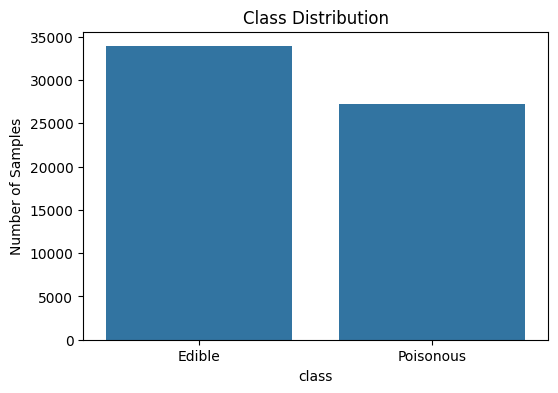

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()

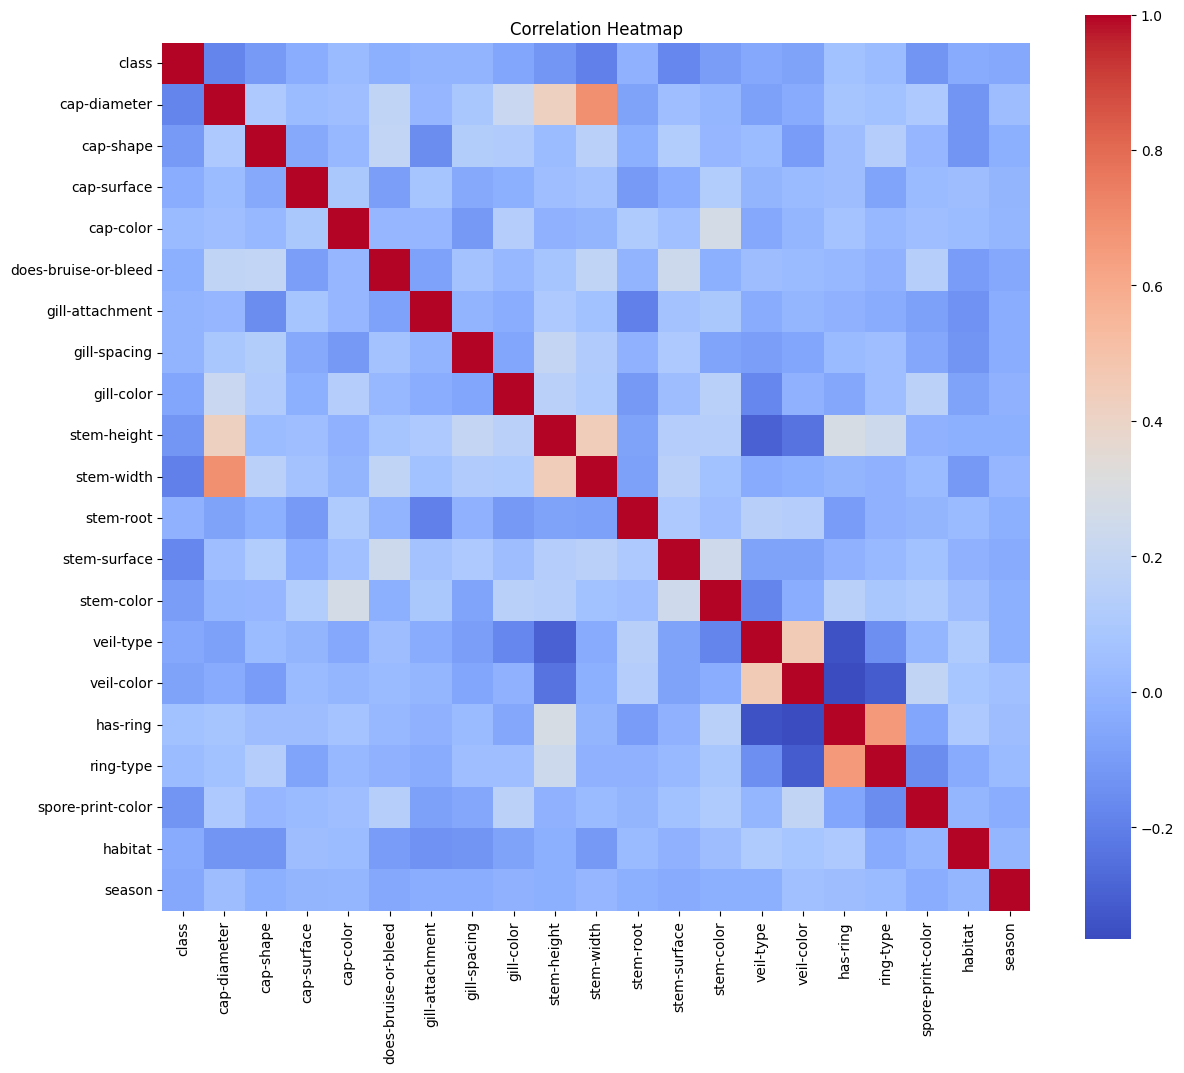

In [ ]:
corr_df = df.copy()
for col in corr_df.columns:
    if corr_df[col].dtype == 'object':
        corr_df[col] = LabelEncoder().fit_transform(corr_df[col])

corr_matrix = corr_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title('Correlation Heatmap')
plt.show()

#2. Preprocessing

In [ ]:
df = df.drop(columns=['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color', 'gill-spacing'])

In [ ]:
df = df.fillna("Missing")

In [ ]:
df['class'] = df['class'].map({'e': 0, 'p': 1})

#4. Splitting the Dataset

In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
numeric_features = ['cap-diameter', 'stem-height', 'stem-width']
categorical_features = [col for col in X.columns if col not in numeric_features]

#5. Feature preprocessing

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

#6. Model Training & Prediction

In [ ]:
models = {
    "Neural Network": MLPClassifier(hidden_layer_sizes=(20,), alpha=0.01, max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=12, min_samples_split=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    con = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec}
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Neural Network
Accuracy: 0.9993995960919164
Precision: 0.9992135273299253
Recall: 0.9997049277072882
Confusion Matrix:
 [[ 8146     8]
 [    3 10164]]

Model: Decision Tree
Accuracy: 0.9385950548550843
Precision: 0.9734031413612565
Recall: 0.9143306776826989
Confusion Matrix:
 [[7900  254]
 [ 871 9296]]

Model: Naive Bayes
Accuracy: 0.7066753998144206
Precision: 0.6984679089026915
Recall: 0.829546572243533
Confusion Matrix:
 [[4513 3641]
 [1733 8434]]


#7. Comparison analysis

Accuracy Comparison Bar Chart

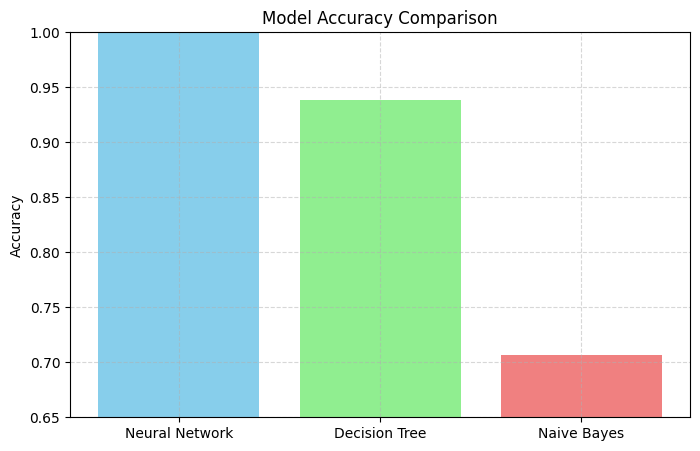

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v['accuracy'] for v in results.values()], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.65, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Precision and Recall Comparison Bar Chart

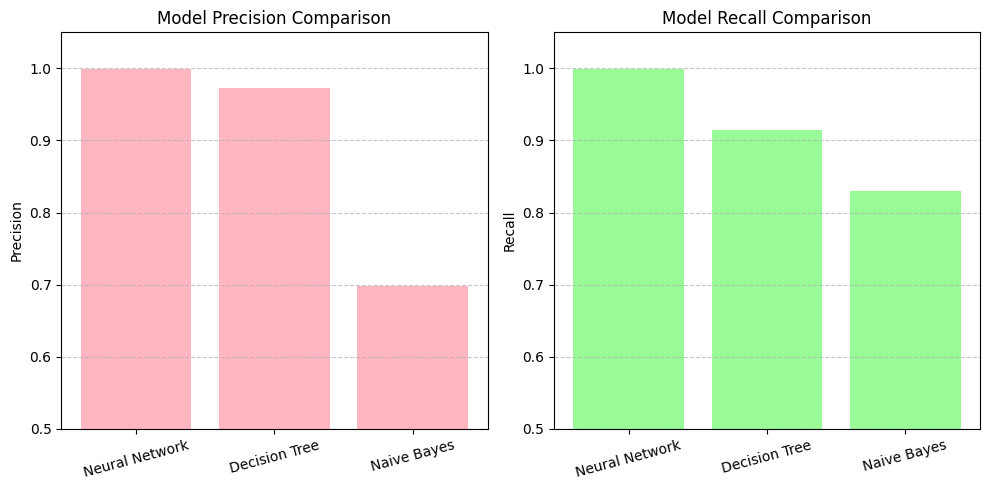

In [ ]:
metrics = ['precision', 'recall']
colors = ['lightpink', 'palegreen']
plt.figure(figsize=(10, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 2, i+1)
    plt.bar(results.keys(), [v[metric] for v in results.values()], color=colors[i])
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.ylim(0.5, 1.05)
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#8. Confusion Matrices

<Figure size 800x600 with 0 Axes>

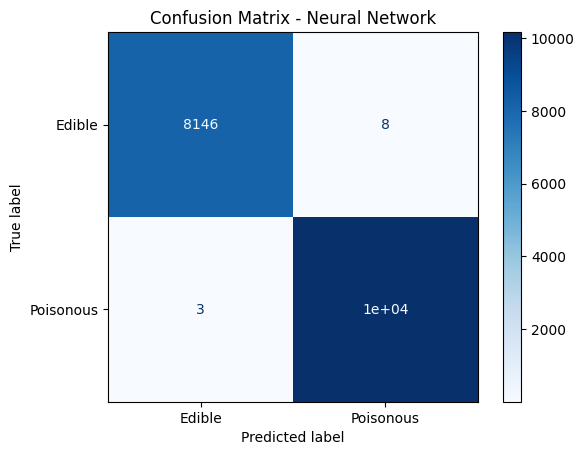

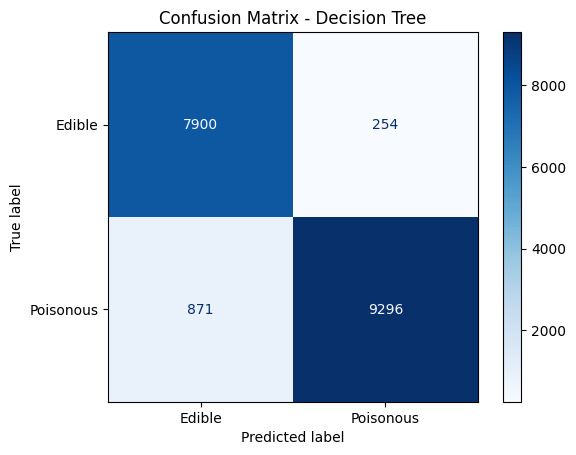

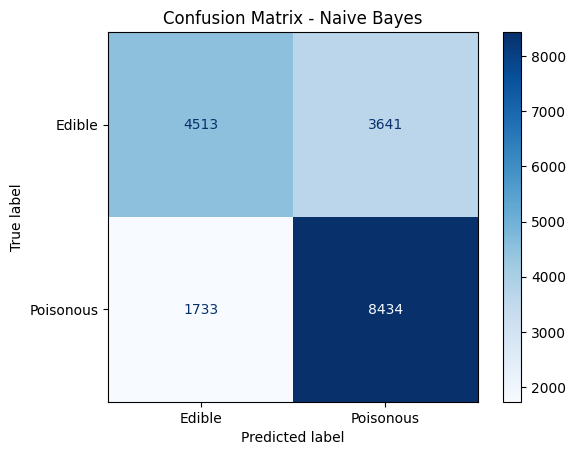

In [ ]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Edible', 'Poisonous'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

#9. ROC and AUC

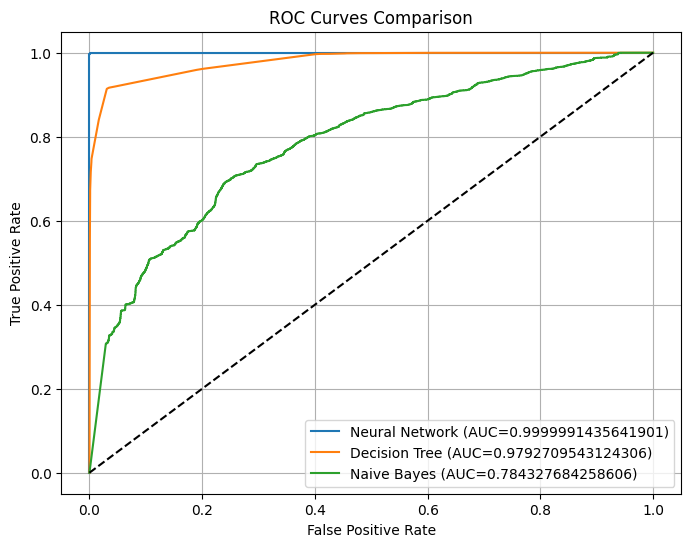

In [ ]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

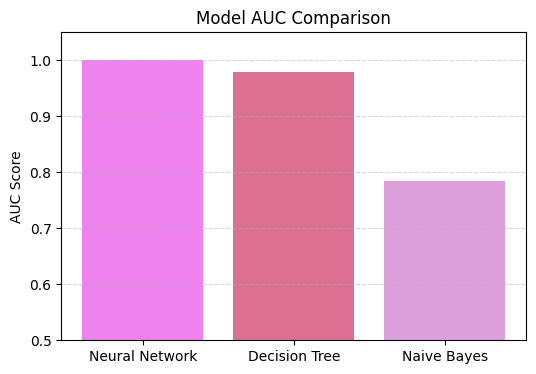

In [ ]:
plt.figure(figsize=(6, 4))
auc_scores = {}
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_scores[name] = auc(fpr, tpr)

plt.bar(auc_scores.keys(), auc_scores.values(), color=['violet', 'palevioletred', 'plum'])
plt.ylim(0.5, 1.05)
plt.ylabel('AUC Score')
plt.title('Model AUC Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()